# QUS 1

In [26]:
def findMin(arr, low, high):  
    if high < low: 
        return arr[low] 
    
    if high == low: 
        return arr[low] 
 
    mid = int((low + high)/2) 
 
    if mid < high and arr[mid+1] < arr[mid]: 
        return arr[mid+1] 
 
    if mid > low and arr[mid] < arr[mid - 1]: 
        return arr[mid] 

    if arr[high] > arr[mid]: 
        return findMin(arr, low, mid-1) 
    return findMin(arr, mid+1, high) 


arr1 = [5, 6, 1, 2, 3, 4] 
n1 = len(arr1) 
print("The minimum element is " + str(findMin(arr1, 0, n1-1))) 

arr2 = [1, 2, 3, 4] 
n2 = len(arr2) 
print("The minimum element is " + str(findMin(arr2, 0, n2-1))) 

arr3 = [1] 
n3 = len(arr3) 
print("The minimum element is " + str(findMin(arr3, 0, n3-1))) 

arr4 = [1, 2] 
n4 = len(arr4) 
print("The minimum element is " + str(findMin(arr4, 0, n4-1))) 

arr5 = [2, 1] 
n5 = len(arr5) 
print("The minimum element is " + str(findMin(arr5, 0, n5-1))) 

arr6 = [5, 6, 7, 1, 2, 3, 4] 
n6 = len(arr6) 
print("The minimum element is " + str(findMin(arr6, 0, n6-1))) 

arr7 = [1, 2, 3, 4, 5, 6, 7] 
n7 = len(arr7) 
print("The minimum element is " + str(findMin(arr7, 0, n7-1))) 

arr8 = [2, 3, 4, 5, 6, 7, 8, 1] 
n8 = len(arr8) 
print("The minimum element is " + str(findMin(arr8, 0, n8-1))) 

arr9 = [3, 4, 5, 1, 2] 
n9 = len(arr9) 
print("The minimum element is " + str(findMin(arr9, 0, n9-1))) 




The minimum element is 1
The minimum element is 1
The minimum element is 1
The minimum element is 1
The minimum element is 1
The minimum element is 1
The minimum element is 1
The minimum element is 1
The minimum element is 1


In [2]:
a = [11,56,23,12,98,56]
print(min(a))

11


In [3]:
a = [1,56,23,12,98,56]
a.sort()
print(a[0])

1


# QUS 2

In [2]:
def editop(str1, str2, m, n):
    if m == 0:
        return n

    elif n == 0:
        return m

    elif str1[m-1] == str2[n-1]:
        return editop(str1, str2, m-1, n-1)

    return 1 + min(editop(str1, str2, m, n-1),editop(str1, str2, m-1, n),editop(str1, str2, m-1, n-1))

In [3]:
str1 = "Quantom"
str2 = "Quantum"
print(editop(str1,str2,len(str1),len(str2)))

1


In [4]:
str1 = "week experience"
str2 = "work experience"
print(editop(str1,str2,len(str1),len(str2)))

2


# QUS 4

In [8]:
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')
mnist = fetch_openml('mnist_784') # online datasets using
x, y = mnist['data'], mnist['target']

(-0.5, 27.5, 27.5, -0.5)

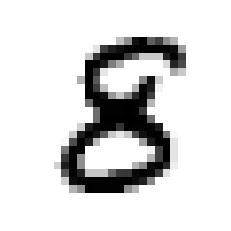

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = x[3601]
some_digit_image = some_digit.reshape(28, 28) # lets reshape it to plot it
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [10]:
y[3601]

'8'

In [11]:
x_train, x_test = x[0:6000], x[6000:7000]

In [12]:
y_train, y_test = y[0:6000], y[6000:7000]

Creating 2 detector

In [13]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [14]:
y_train

array([5, 0, 4, ..., 8, 6, 9], dtype=int8)

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
clf = classifier.fit(x_train, y_train)

In [16]:
y_pred = classifier.predict(x_test)

without using pca Accuracy

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.878

Now use PCA

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
train = pca.fit_transform(x_train)
test = pca.transform(x_test)

In [20]:
print(train.shape)
print(test.shape)

(6000, 2)
(1000, 2)


In [21]:
pca.explained_variance_ratio_.shape

(2,)

In [22]:
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = classifier.predict(x_test)

Now Accuracy with PCA

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.905

Hence When we are find Acccuracy without using PCA So it take more time consuming and gives less accurate result ,But When we are using PCA , then it gives High accuracy and takes less time consuming, Because PCA is dimensions reduction algorithms.

# QUS 5

# ROAD LANE PRIDICTIONS

In [1]:
import matplotlib.pylab as plt
import cv2
import numpy as np

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img


def process(image):
    print(image.shape)
    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_vertices = [
        (0, height),
        (width/2, height/2),
        (width, height)
    ]
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    canny_image = cv2.Canny(gray_image, 100, 120)
    
    cropped_image = region_of_interest(canny_image,np.array([region_of_interest_vertices], np.int32),)
    lines = cv2.HoughLinesP(cropped_image,
                            rho=2,
                            theta=np.pi/180,
                            threshold=50,
                            lines=np.array([]),
                            minLineLength=40,
                            maxLineGap=100)
    image_with_lines = drow_the_lines(image, lines)
    return image_with_lines

cap = cv2.VideoCapture(r'test2.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    frame = process(frame)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280